In [91]:
import pandas as pd
file_path = ("Jaipur-D06-Community-Facilities.csv")
df = pd.read_csv(file_path)



 Understanding the Data

# Data Cleaning

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   City Name                                                                                         91 non-null     object 
 1   Zone Name                                                                                         91 non-null     object 
 2   Ward Name                                                                                         0 non-null      float64
 3   Ward  No                                                                                          91 non-null     int64  
 4   Type: Community Hall / Auditorium / Convention Center / Swimming Pools / Sports Ground / Theatre  17 non-null     object 
 5   Faci

In [97]:
df.head()

,City Name,Zone Name,Ward Name,Ward No,Type: Community Hall / Auditorium / Convention Center / Swimming Pools / Sports Ground / Theatre,Facility Name,Capacity (wherever applicable)
0,Jaipur,Vidhyadhar Nagar,NaN,1,NaN,NaN,NaN
1,Jaipur,Vidhyadhar Nagar,NaN,2,NaN,NaN,NaN
2,Jaipur,Vidhyadhar Nagar,NaN,3,NaN,NaN,NaN
3,Jaipur,Vidhyadhar Nagar,NaN,4,NaN,NaN,NaN
4,Jaipur,Vidhyadhar Nagar,NaN,5,NaN,NaN,NaN


The dataset has 91 rows and 7 columns.
The "Ward Name" column is entirely empty.
The "Type" and "Facility Name" columns have many missing values (only 17 non-null values).
The "Capacity" column also has missing values (16 non-null).
Some column names are lengthy and need renaming.

In [100]:
df.drop(columns=["Ward Name"], inplace=True)


Drop Empty or Unnecessary Columns


In [103]:
df.rename(columns={
    "Type: Community Hall / Auditorium / Convention Center / Swimming Pools / Sports Ground / Theatre": "Facility Type",
    "Capacity (wherever applicable)": "Capacity"
}, inplace=True)

Rename Columns for Clarity

In [106]:
print(df.columns)  


Index(['City Name', 'Zone Name', 'Ward  No ', 'Facility Type', 'Facility Name',
       'Capacity'],
      dtype='object')


In [108]:
print(df.shape)  


(91, 6)


In [110]:
print(df.isnull().sum())  


City Name         0
Zone Name         0
Ward  No          0
Facility Type    74
Facility Name    74
Capacity         75
dtype: int64


In [117]:
print(df.head())  


  City Name         Zone Name  Ward  No  Facility Type Facility Name  Capacity
0    Jaipur  Vidhyadhar Nagar          1       Unknown       Unknown         0
1    Jaipur  Vidhyadhar Nagar          2       Unknown       Unknown         0
2    Jaipur  Vidhyadhar Nagar          3       Unknown       Unknown         0
3    Jaipur  Vidhyadhar Nagar          4       Unknown       Unknown         0
4    Jaipur  Vidhyadhar Nagar          5       Unknown       Unknown         0


In [127]:
df["Facility Type"] = df["Facility Type"].fillna("Unknown")
df["Facility Name"] = df["Facility Name"].fillna("Unknown")


In [129]:
df.fillna({"Facility Type": "Unknown", "Facility Name": "Unknown"}, inplace=True)


Handle Missing Values in Categorical Columns


In [115]:
df["Capacity"] = pd.to_numeric(df["Capacity"], errors='coerce').fillna(0).astype(int)

Convert Capacity to Numeric and Handle Errors

In [30]:
df_cleaned = df[(df["Facility Type"] != "Unknown") & (df["Facility Name"] != "Unknown")]

Remove Rows Where Both Facility Name and Type are Unknown

In [33]:
df_cleaned = df_cleaned.drop_duplicates()

Check for Duplicate Entries and Remove Them

In [36]:
df_cleaned.reset_index(drop=True, inplace=True)

In [38]:
print("Cleaned Data:")
print(df_cleaned.head())


Cleaned Data:
  City Name         Zone Name  Ward  No    Facility Type  \
0    Jaipur  Vidhyadhar Nagar         10  Community Hall   
1    Jaipur  Vidhyadhar Nagar         23  Community Hall   
2    Jaipur        Mansarovar         32  Community Hall   
3    Jaipur          Sanganer         39  Community Hall   
4    Jaipur       Moti Dungri         53  Community Hall   

                        Facility Name  Capacity  
0             Ambabari Community Hall       800  
1  Lal Bahadur Shastri Community Hall       800  
2               Varun Path Mansarovar       300  
3                            Sanganer       500  
4                      Malviya Nagar        700  


In [40]:
df_cleaned = df[(df["Facility Type"] != "Unknown") & (df["Facility Name"] != "Unknown")]
df_cleaned.head(10)

,City Name,Zone Name,Ward No,Facility Type,Facility Name,Capacity
9,Jaipur,Vidhyadhar Nagar,10,Community Hall,Ambabari Community Hall,800
22,Jaipur,Vidhyadhar Nagar,23,Community Hall,Lal Bahadur Shastri Community Hall,800
31,Jaipur,Mansarovar,32,Community Hall,Varun Path Mansarovar,300
38,Jaipur,Sanganer,39,Community Hall,Sanganer,500
52,Jaipur,Moti Dungri,53,Community Hall,Malviya Nagar,700
59,Jaipur,Moti Dungri,60,Community Hall,Tilak Nagar,2000
62,Jaipur,Hawa Mahal East,63,Community Hall,Jamdoli Community Hall,300
67,Jaipur,Hawa Mahal East,68,Community Hall,Eidgah Delhi By Pass Community Hall,300
70,Jaipur,Hawa Mahal East,71,Community Hall,Mandi Khatikan Hida Ki Mori Community Hall,300
71,Jaipur,Hawa Mahal East,72,Community Hall,Naharwada Community Hall,300


In [42]:
df_cleaned.to_csv("Cleaned_Community_Facilities.csv", index=False)

In [44]:
df.head(10)


,City Name,Zone Name,Ward No,Facility Type,Facility Name,Capacity
0,Jaipur,Vidhyadhar Nagar,1,Unknown,Unknown,0
1,Jaipur,Vidhyadhar Nagar,2,Unknown,Unknown,0
2,Jaipur,Vidhyadhar Nagar,3,Unknown,Unknown,0
3,Jaipur,Vidhyadhar Nagar,4,Unknown,Unknown,0
4,Jaipur,Vidhyadhar Nagar,5,Unknown,Unknown,0
5,Jaipur,Vidhyadhar Nagar,6,Unknown,Unknown,0
6,Jaipur,Vidhyadhar Nagar,7,Unknown,Unknown,0
7,Jaipur,Vidhyadhar Nagar,8,Unknown,Unknown,0
8,Jaipur,Vidhyadhar Nagar,9,Unknown,Unknown,0
9,Jaipur,Vidhyadhar Nagar,10,Community Hall,Ambabari Community Hall,800


 Display the cleaned dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   City Name      91 non-null     object
 1   Zone Name      91 non-null     object
 2   Ward  No       91 non-null     int64 
 3   Facility Type  91 non-null     object
 4   Facility Name  91 non-null     object
 5   Capacity       91 non-null     int32 
dtypes: int32(1), int64(1), object(4)
memory usage: 4.0+ KB


In [49]:
df.isnull().sum()

City Name        0
Zone Name        0
Ward  No         0
Facility Type    0
Facility Name    0
Capacity         0
dtype: int64

# Data Visualization

C:\Users\Rishika\AppData\Local\Temp\ipykernel_3336\1988362197.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=facility_count.index, y=facility_count.values, palette="coolwarm")


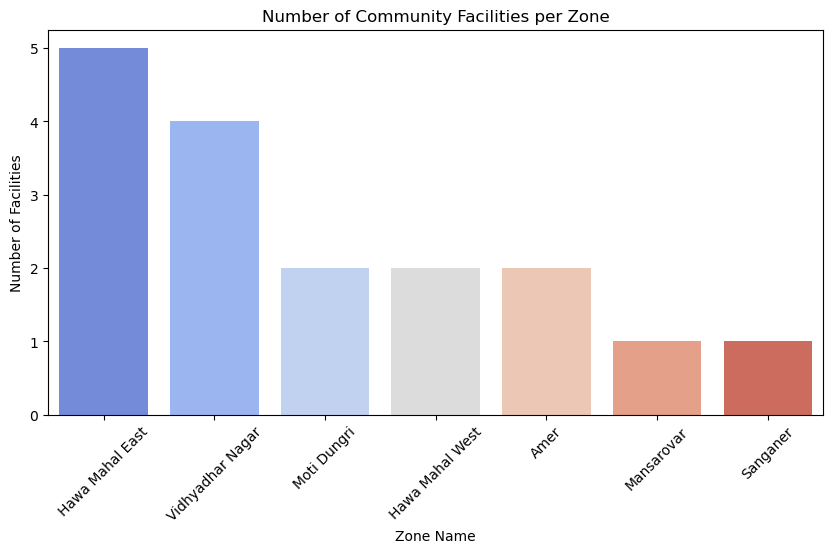

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
facility_count = df_cleaned["Zone Name"].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=facility_count.index, y=facility_count.values, palette="coolwarm")
plt.xlabel("Zone Name")
plt.ylabel("Number of Facilities")
plt.title("Number of Community Facilities per Zone")
plt.xticks(rotation=45)
plt.show()


Bar Chart of Facility Count per Zone

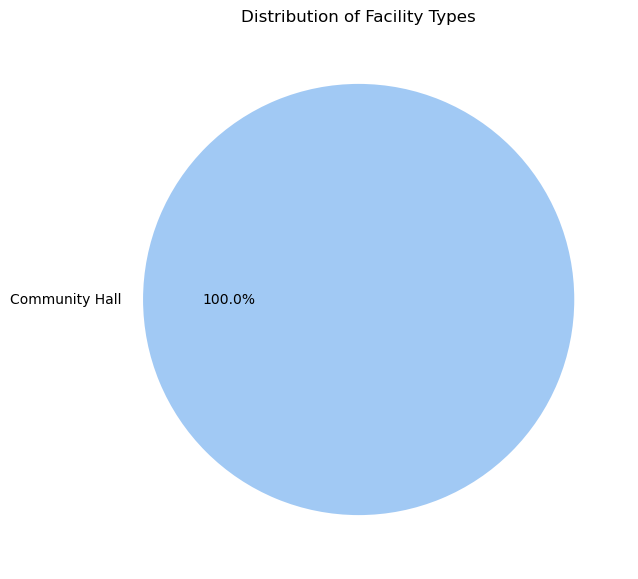

In [54]:
plt.figure(figsize=(7, 7))
df_cleaned["Facility Type"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Distribution of Facility Types")
plt.ylabel("")
plt.show()


Pie Chart of Facility Type Distribution

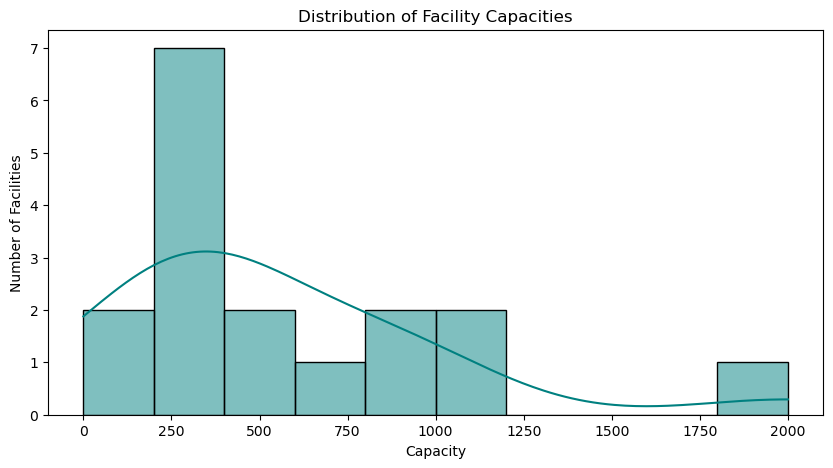

In [56]:
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["Capacity"], bins=10, kde=True, color="teal")
plt.xlabel("Capacity")
plt.ylabel("Number of Facilities")
plt.title("Distribution of Facility Capacities")
plt.show()


Histogram of Facility Capacities

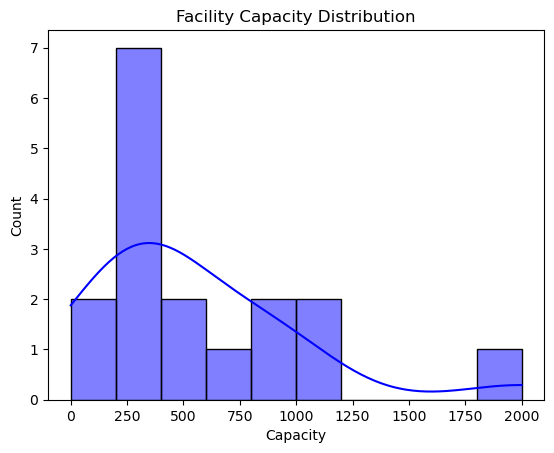

In [58]:
sns.histplot(df_cleaned["Capacity"], bins=10, kde=True, color="blue")  
plt.title("Facility Capacity Distribution")  
plt.show()

C:\Users\Rishika\AppData\Local\Temp\ipykernel_3336\3785697226.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Zone Name", y="Capacity", data=df_cleaned, palette="Set2")


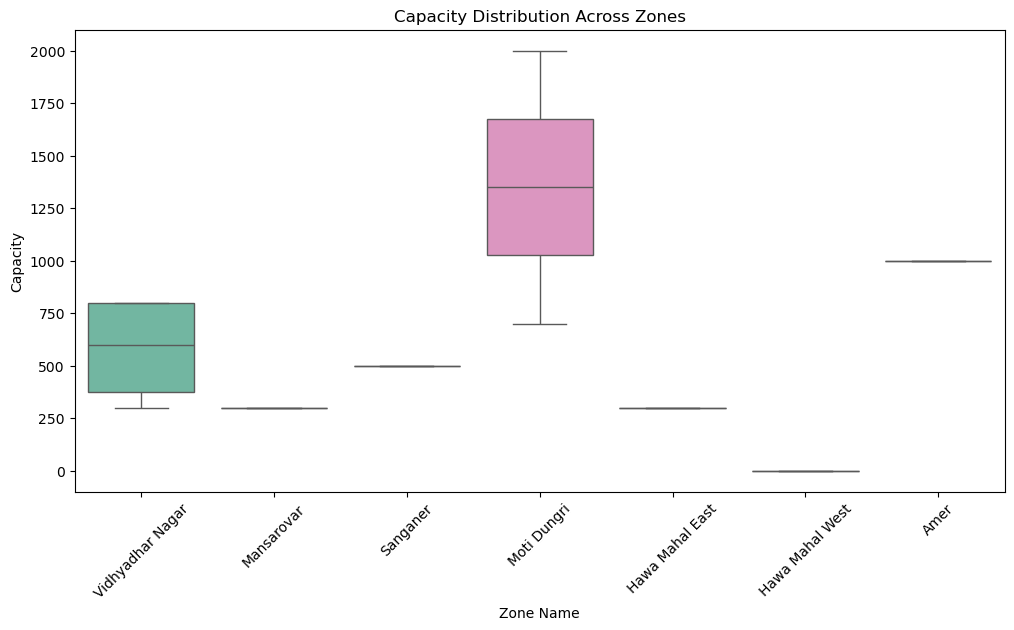

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Zone Name", y="Capacity", data=df_cleaned, palette="Set2")
plt.xticks(rotation=45)
plt.xlabel("Zone Name")
plt.ylabel("Capacity")
plt.title("Capacity Distribution Across Zones")
plt.show()


Box Plot of Facility Capacity by Zone

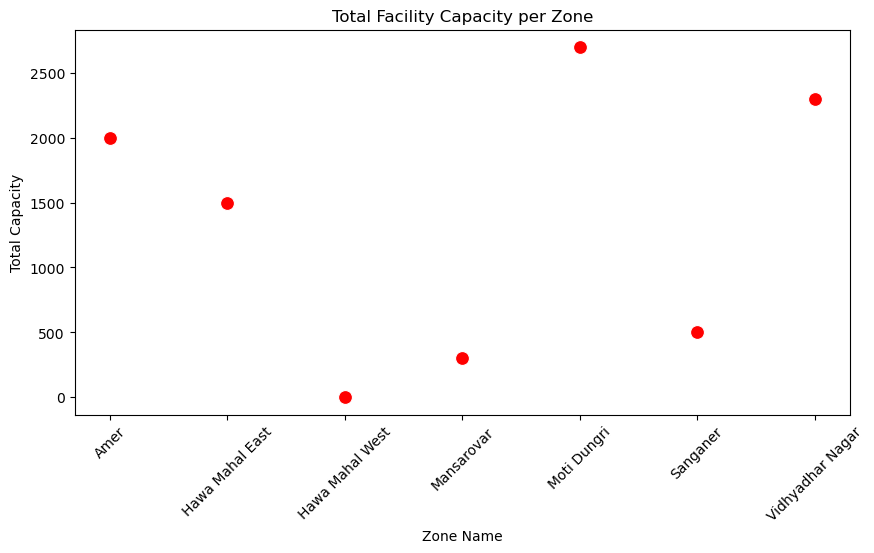

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
total_capacity_by_zone = df_cleaned.groupby("Zone Name")["Capacity"].sum()
plt.figure(figsize=(10, 5))
sns.scatterplot(x=total_capacity_by_zone.index, y=total_capacity_by_zone.values, color="red", s=100)
plt.xticks(rotation=45)
plt.xlabel("Zone Name")
plt.ylabel("Total Capacity")
plt.title("Total Facility Capacity per Zone")
plt.show()


Scatter Plot of Capacity vs. Facility Count per ZonepythonCopyEdit


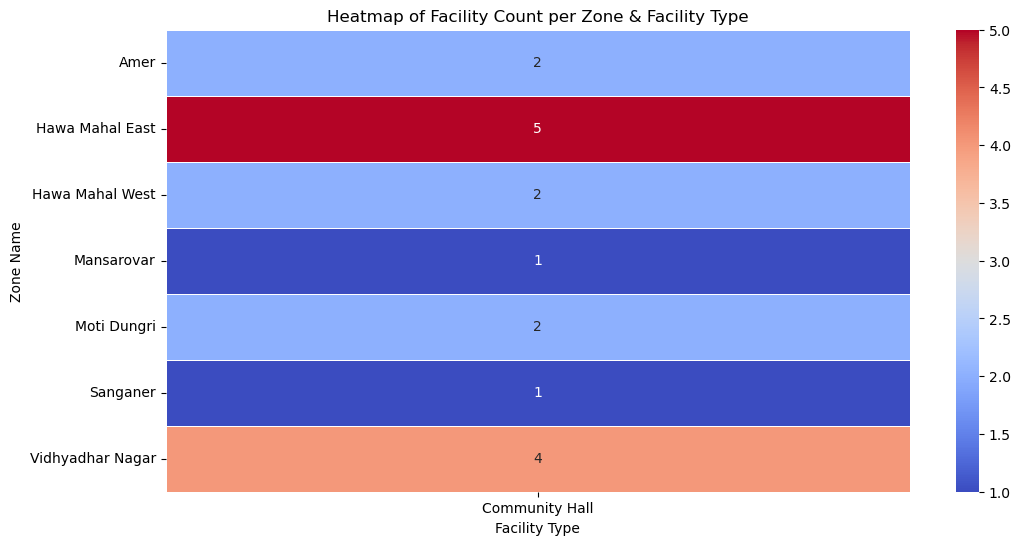

In [73]:
facility_pivot = df_cleaned.pivot_table(index="Zone Name", columns="Facility Type", aggfunc="size", fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(facility_pivot, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Facility Count per Zone & Facility Type")
plt.xlabel("Facility Type")
plt.ylabel("Zone Name")
plt.show()


Heatmap of Facility Count per Zone & Facility Type

C:\Users\Rishika\AppData\Local\Temp\ipykernel_3336\3367702136.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_cleaned["Facility Type"], y=df_cleaned["Capacity"], palette="coolwarm")


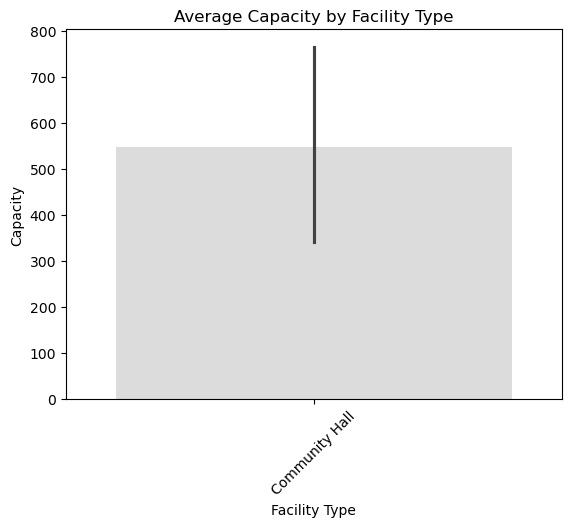

In [73]:
sns.barplot(x=df_cleaned["Facility Type"], y=df_cleaned["Capacity"], palette="coolwarm")  
plt.xticks(rotation=45)  
plt.title("Average Capacity by Facility Type")  
plt.show()


Bar Plot: Facility Type vs Capacity  

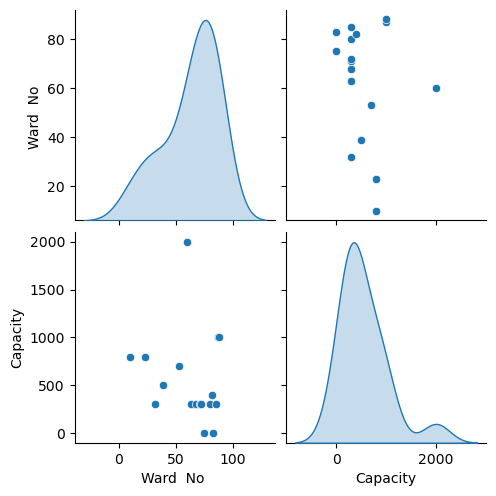

In [78]:
sns.pairplot(df_cleaned, diag_kind="kde")  
plt.show()

Pairplot (Shows relationships between multiple variables)  